In [227]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
sns.set(font_scale=0.7)

In [156]:
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [298]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
Xy = pd.concat([X, y], axis=1)
Xy.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


### IDA (initial data analysis) - data ingeretry

In [158]:
# check for nulls

# Xy.iloc[0, 3] = None
Xy.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [159]:
# check for duplicates

# Xy.iloc[1, :] = X.iloc[0, :]
Xy.duplicated().sum()

np.int64(0)

age       2.327895
sex       1.065488
bmi       3.585718
bp        2.776058
s1        3.235851
s2        4.179278
s3        3.809072
s4        3.894331
s5        2.808722
s6        2.896390
target    2.517559
dtype: float64

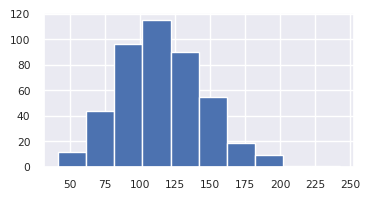

In [160]:
# outliers

# Xy.loc[0, 's2'] = 400
Xy['s2'].hist(figsize=(4, 2))
pd.DataFrame(data=stats.zscore(Xy), columns=Xy.columns).abs().max()

### EDA (exploratory data analysis)

In [161]:
# descriptive stats
Xy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
sex,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
bmi,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
bp,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
s1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
s2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
s3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
s4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
s5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
s6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


<Axes: >

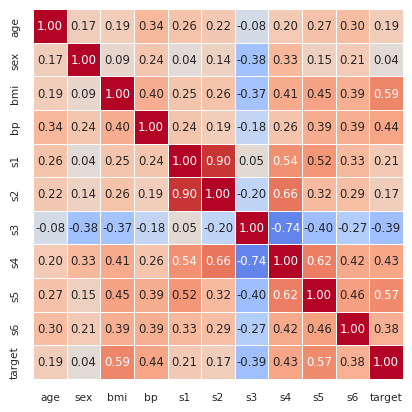

In [170]:
# Correlations

sns.heatmap(
    data=Xy.corr(), annot=True, fmt=".2f", cmap='coolwarm',
    vmin=-1, vmax=1, center=0, cbar=False, square=True, linewidths=0.5
)

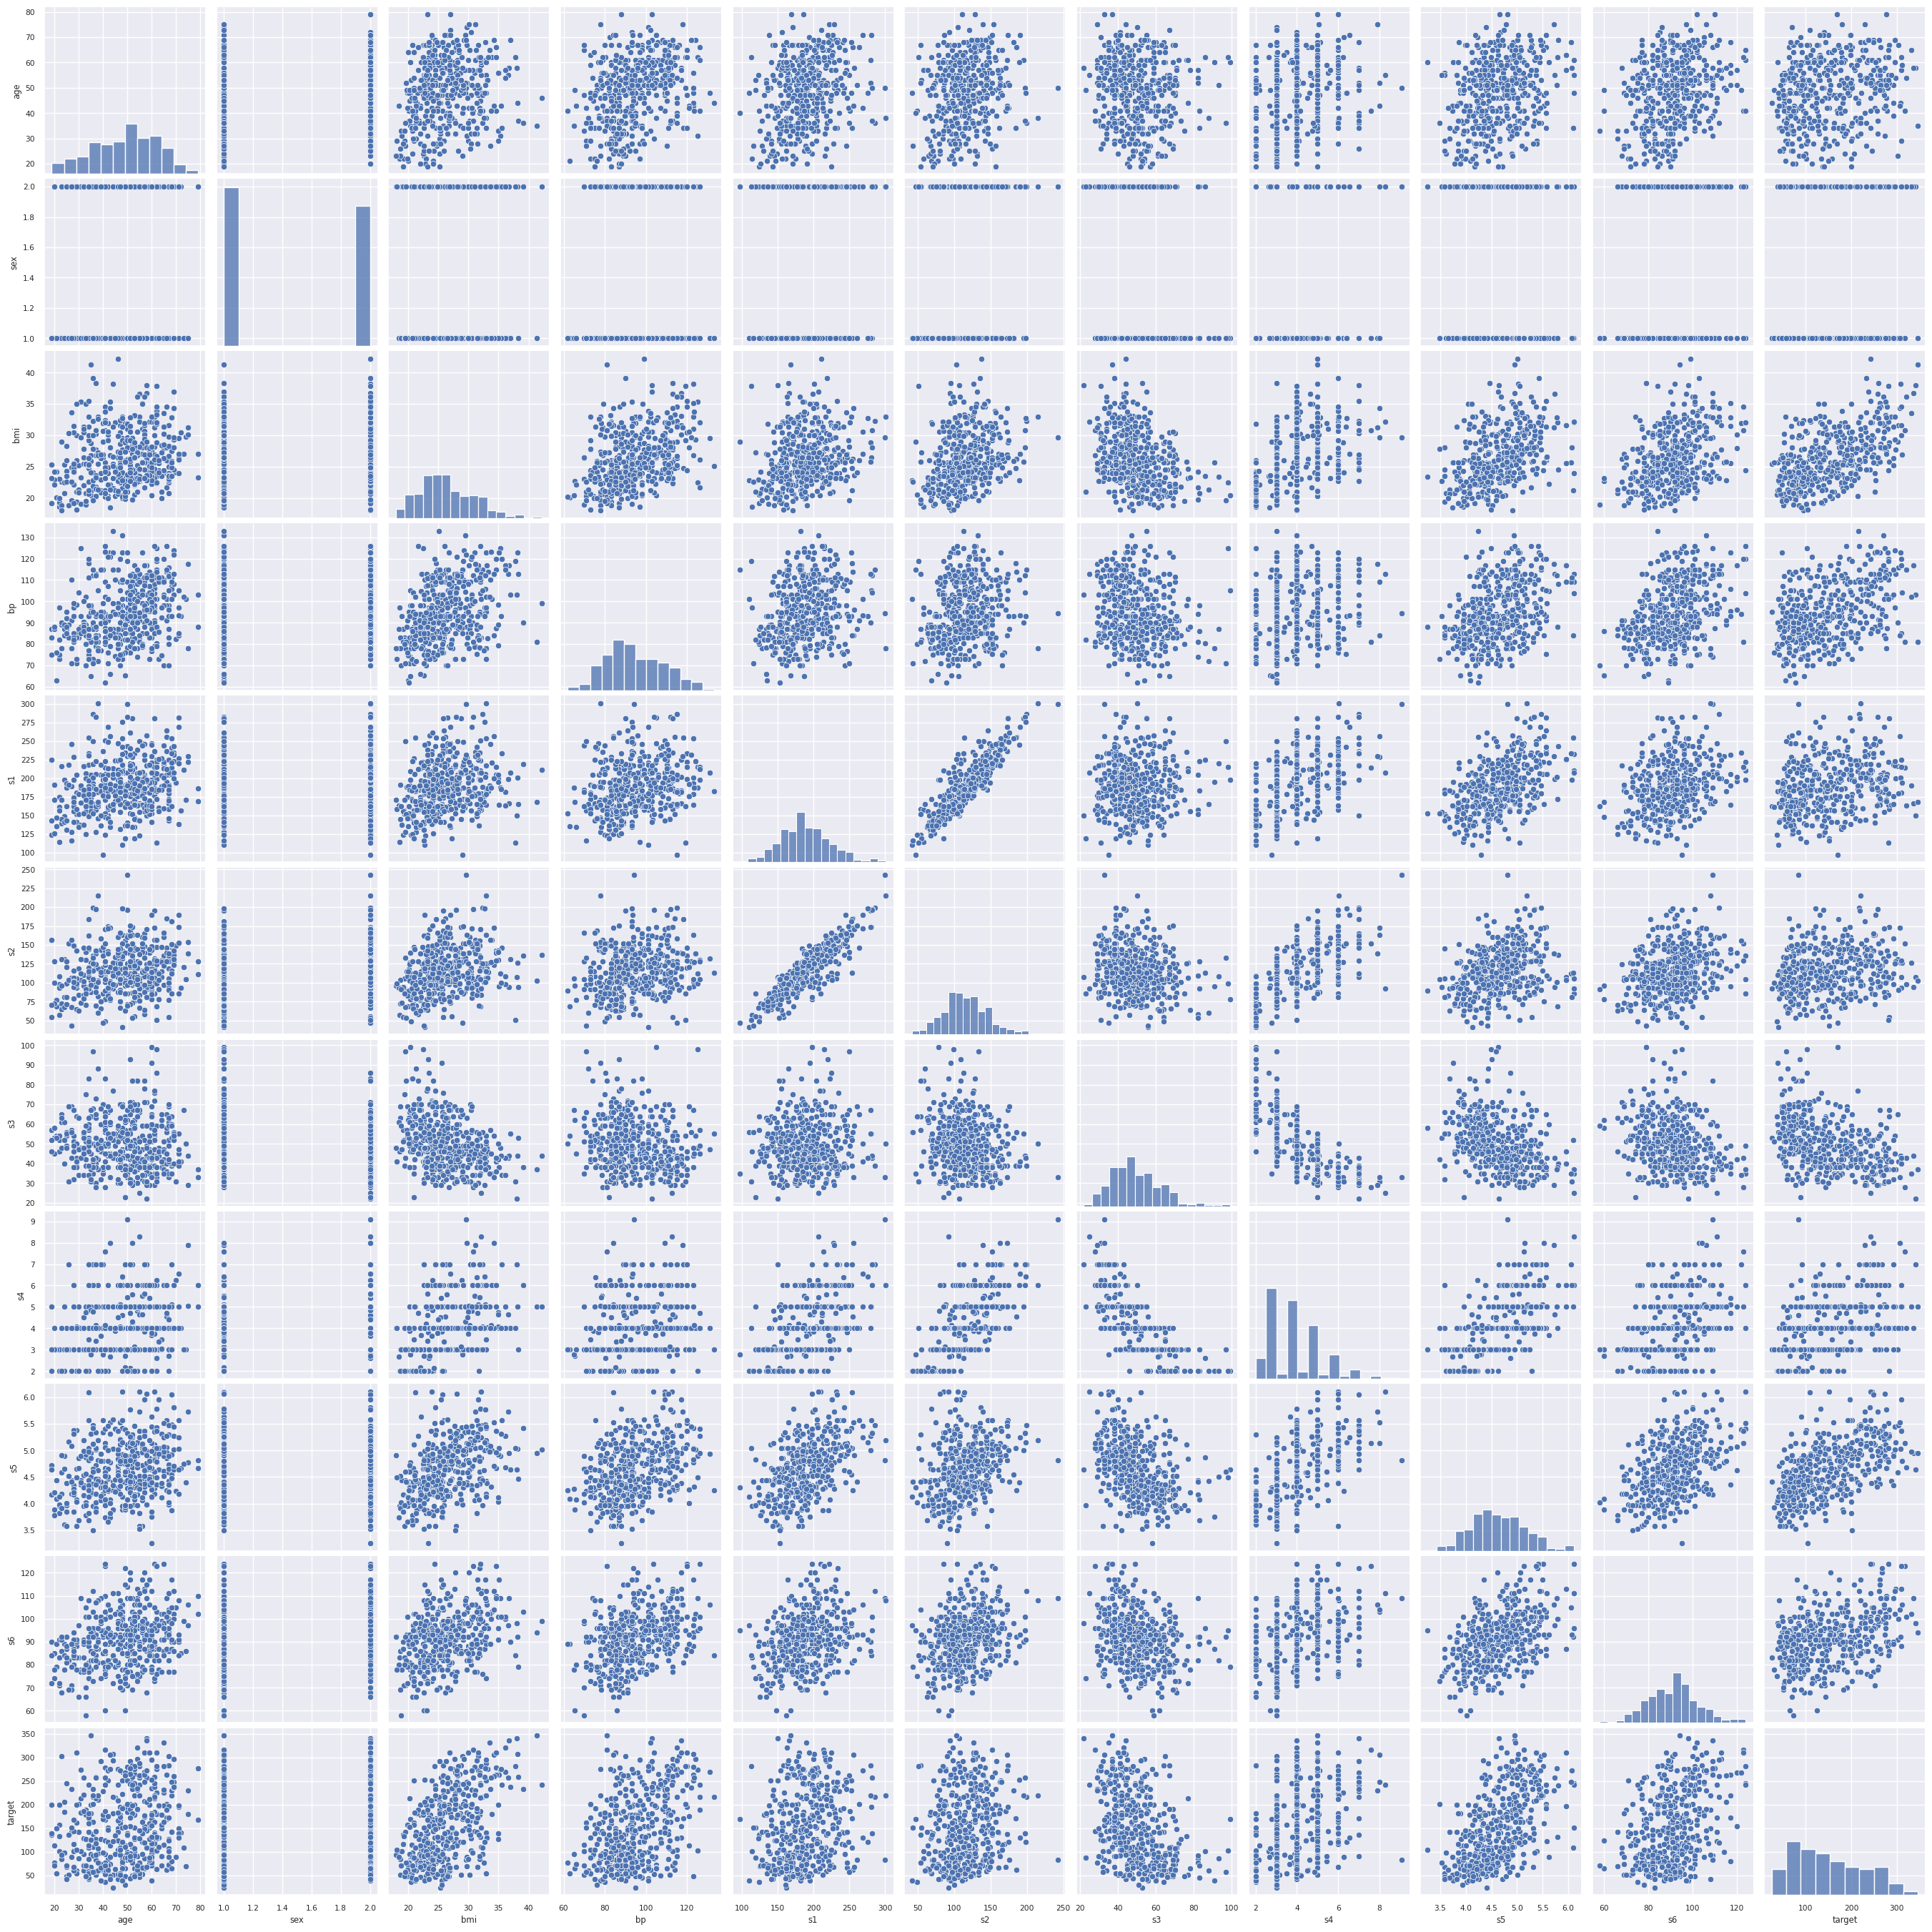

In [174]:
# Relationship; scatterplot + histograms

sns.pairplot(Xy)

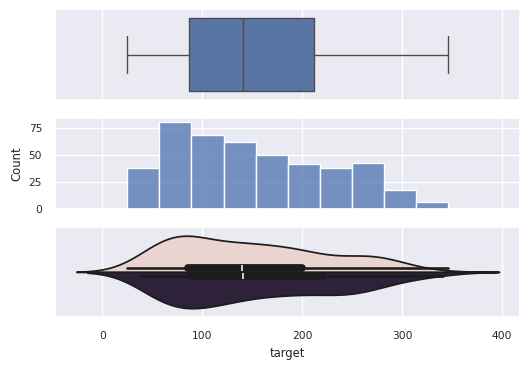

In [216]:
# Example of violinplot showing boxplot + histplot

fig, ax = plt.subplots(nrows=3, figsize=(6, 4), sharex=True)
sns.boxplot(y, orient='h', ax=ax[0])
sns.histplot(y, ax=ax[1])
sns.violinplot(x=y, orient='h', hue=X.sex, split=True, legend=False, ax=ax[2])
plt.show()

### Feature Engineering

In [305]:
# MSE for X
# LR
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
clf = LinearRegression()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

# MSE after apply polynomial transformations

X['s5^2'] = X.s5 ** 2
X['s5^3'] = X.s5 ** 3
X['s5^4'] = X.s5 ** 4
X['s5^5'] = X.s5 ** 5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.4707001484691934
0.47055639773900504


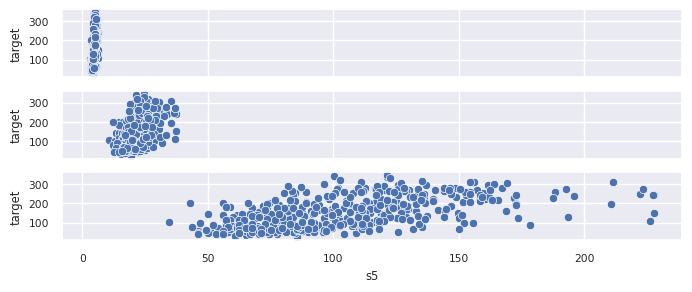

In [328]:
fig, ax = plt.subplots(nrows=3, figsize=(8, 3), sharex=True)
sns.scatterplot(x=X.s5 ** 1, y=y, ax=ax[0])
sns.scatterplot(x=X.s5 ** 2, y=y, ax=ax[1])
sns.scatterplot(x=X.s5 ** 3, y=y, ax=ax[2])
plt.show()

# ,# Feature Selection

In [125]:
#